In [1]:
#Importing the Libraries
import pandas as pd
from pandas import datetime
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import sklearn as skl

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn import linear_model
# from keras.models import Sequential
# from keras.layers import Dense
# import keras.backend as K
# from keras.callbacks import EarlyStopping
#from keras.optimizers import Adam
# from keras.models import load_model
# from keras.layers import LSTM
# from keras.utils.vis_utils import plot_model


In [2]:
#Get the Dataset
df=pd.read_csv("BACstock.csv",na_values=['null'],index_col='date',parse_dates=True,infer_datetime_format=True)
df.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,11.86,11.90,11.72,11.760,145217221,BAC
2013-02-11,11.73,11.90,11.67,11.860,103499848,BAC
2013-02-12,11.87,12.34,11.78,12.245,231771561,BAC
2013-02-13,12.35,12.42,12.05,12.170,192478919,BAC
2013-02-14,12.09,12.27,12.07,12.130,143901737,BAC


In [3]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (1259, 6)
Null Value Present:  False


<AxesSubplot:xlabel='date'>

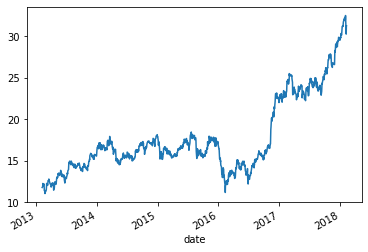

In [5]:
#Plot the True Adj Close Value
df["close"].plot()

In [6]:
#Set Target Variable
output_var = pd.DataFrame(df["close"])
#Selecting the Features
features = ['open', 'high', 'low', 'volume']

In [7]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,open,high,low,volume
date,,,,
2013-02-08,0.034709,0.031702,0.034906,0.362911
2013-02-11,0.028612,0.031702,0.032547,0.247291
2013-02-12,0.035178,0.052214,0.037736,0.602796
2013-02-13,0.057692,0.055944,0.050472,0.493897
2013-02-14,0.045497,0.048951,0.051415,0.359265


In [8]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [9]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [26]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
# from keras.optimizers import Adam
from keras.models import load_model

from keras.utils.vis_utils import plot_model




In [27]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [28]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
144/144 [==============================] - 3s 5ms/step - loss: 282.4007
Epoch 2/100
144/144 [==============================] - 1s 6ms/step - loss: 250.6393
Epoch 3/100
144/144 [==============================] - 1s 5ms/step - loss: 189.2015
Epoch 4/100
144/144 [==============================] - 1s 5ms/step - loss: 111.2541
Epoch 5/100
144/144 [==============================] - 1s 4ms/step - loss: 47.7473
Epoch 6/100
144/144 [==============================] - 1s 4ms/step - loss: 15.4009
Epoch 7/100
144/144 [==============================] - 1s 6ms/step - loss: 5.4478
Epoch 8/100
144/144 [==============================] - 1s 6ms/step - loss: 3.4065
Epoch 9/100
144/144 [==============================] - 1s 6ms/step - loss: 2.9538
Epoch 10/100
144/144 [==============================] - 1s 5ms/step - loss: 2.7385
Epoch 11/100
144/144 [==============================] - 1s 5ms/step - loss: 2.5679
Epoch 12/100
144/144 [==============================] - 1s 5ms/step - loss: 2.3904
Epo

In [15]:
#LSTM Prediction
y_pred= lstm.predict(X_test)
y_pred

array([[23.924078],
       [23.783535],
       [23.384584],
       [23.795813],
       [23.953133],
       [23.980055],
       [23.591356],
       [23.440922],
       [23.156315],
       [23.048187],
       [23.26739 ],
       [23.668068],
       [24.057772],
       [24.367414],
       [24.257553],
       [24.539106],
       [24.766317],
       [24.898043],
       [25.063395],
       [24.954756],
       [24.832125],
       [24.812052],
       [25.32787 ],
       [25.471994],
       [25.36555 ],
       [25.471348],
       [25.721838],
       [25.786966],
       [25.838087],
       [26.127783],
       [26.006355],
       [25.787552],
       [25.776827],
       [25.627386],
       [25.430506],
       [25.9733  ],
       [26.228638],
       [26.346704],
       [26.256062],
       [26.922155],
       [27.130262],
       [27.378601],
       [27.53649 ],
       [27.661211],
       [27.625256],
       [27.49465 ],
       [27.431782],
       [27.44539 ],
       [27.440928],
       [27.604536],


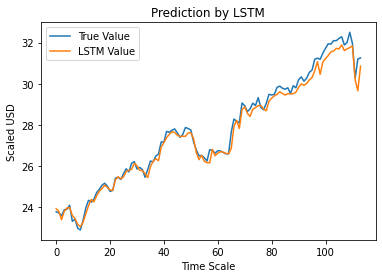

In [16]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error
import math
from math import sqrt
import requests
import keras
from keras.models import load_model
from sklearn import preprocessing
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


In [39]:
def denormalize(df, normalized_value):
    df = df['close'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)

    #return df.shape, p.shape
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new
p = lstm.predict(X_test)
newp = denormalize(df, p)
newy_test = denormalize(df, y_test)

In [43]:
# use F score to measure the model

def model_F_score(newp,newy_test):
    TP=0
    FN=0
    FP=0
    for i in range(len(newp)-1):
        test_prof=newy_test[i+1]-newy_test[i]
        p_prof=newp[i+1] - newp[i]

        if((test_prof>=0) and (p_prof>=0)):
            TP=TP+1
        if ((test_prof>= 0) and (p_prof<0)):
            FN=FN+1
        if ((test_prof<0) and (p_prof>=0)):
            FP=FP+1

    Precision=float(TP)/float(TP+FP)
    Recall=float(TP)/float(TP+FN)

    Fscore= 2.0*Precision*Recall/(Precision+Recall)
    print('classification F score: %.5f' % (Fscore))
    return Fscore
    
testScore = math.sqrt(mean_squared_error(newp, newy_test))
print('Test Score: %.2f RMSE' % (testScore))

F_score=model_F_score(newp,newy_test)
print ('F_score',F_score)

Test Score: 10.08 RMSE
classification F score: 0.74242
F_score 0.7424242424242424
